Text Mining

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [2]:
!pip install -U textblob

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import re
import nltk
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud

In [6]:
tweets =pd.read_csv('Elon_musk.csv',engine="python",encoding='latin1',error_bad_lines=False)

<ipython-input-6-0dc82e42efe8>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets =pd.read_csv('Elon_musk.csv',engine="python",encoding='latin1',error_bad_lines=False)


In [7]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


EDA

In [8]:
# clean the text
def cleantext(text):
    text=re.sub(r'@[A-Za-z]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[/s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)

    return text

In [9]:
tweets['Text']= tweets['Text'].apply(cleantext)
tweets

,Unnamed: 0,Text
0,1,11 Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,27 Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...
...,...,...
1994,1995,"True, it sounds so surreal, but the negative ..."
1995,1996,Make sure to read ur terms &amp; conditions b...
1996,1997,Samwise Gamgee
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...


Create a function to get the subjectivity

In [10]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


## create a function to getthe polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create a new column
tweets['Subjectivity']= tweets['Text'].apply(getSubjectivity)
tweets['Polarity']=tweets['Text'].apply(getPolarity)

Plot the word cloud

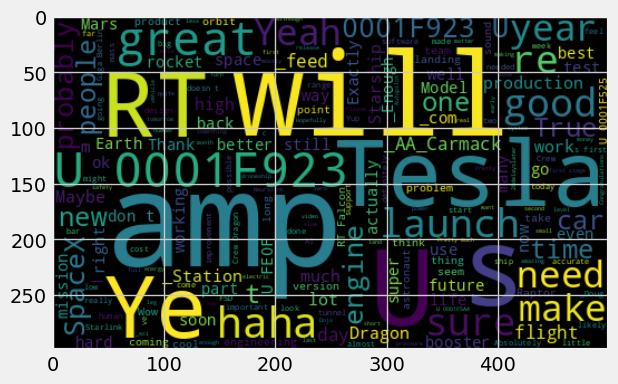

In [11]:
All_words = ' '.join([twts for twts in tweets['Text']])
wordcloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(All_words)
plt.imshow(wordcloud,interpolation='bilinear')

plt.show()

In [12]:
## Creating a function for compute the negative , neutral  and positive words
def getAnanlysis(score):

    if score <0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return'Positive'
tweets['Anaylsis']=tweets['Polarity'].apply(getAnanlysis)

In [13]:
tweets

,Unnamed: 0,Text,Subjectivity,Polarity,Anaylsis
0,1,11 Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,27 Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


Positive Tweets

In [14]:
j=1
sortedTweets =tweets.sort_values(by=['Polarity'])
for i in range (0,sortedTweets.shape[0]):
    print(str(j)+')' +sortedTweets['Text'][i])
    print()
    j=j+1

1)11 Im an alien

2)_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?

3)  Great interview!

4)27 Doge is underestimated

5) Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!

6)Happy New Year of the Ox! 

7)Frodo was the underdoge,
All thought he would fail,
Himself most of all. 

8)_  10 Haha thanks :)

9) 10 Indeed! Tweets definitely do not represent real-world time allocation.

10)The most entertaining outcome is the most likely

11) Just sent some

12)Just agree to do Clubhouse with 

13)

14)  Its getting real

15)Bought some Dogecoin for lil X, so he can be a toddler hodler

16) He definitely has issues, but the sentencing seems a bit high

17) Thanks for fixing

18) Please unlock my account

19) <U+0001F923><U+0001F923>

20)This is true power haha 

21) Any crypto wallet that wont give you your private keys should be avoided at all costs

22) Your app sucks

23)RT : NASA has selected Falcon Heavy to 

Negative Tweets

In [15]:
j=1
sortedTweets =tweets.sort_values(by=['Polarity'],ascending=False)
for i in range (0,sortedTweets.shape[0]):
    if(sortedTweets['Anaylsis'][i]=='Negative'):

        print(str(j)+')' +sortedTweets['Text'][i])
        print()
        j=j+1

1)11 Im an alien

2) Your app sucks

3) _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 

4) _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 

5) Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.

6) Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas 

7)  It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land

8) We were too dumb

9)This was a tough one 

10)RT : This mission enables access for everyday people who dream of going to space

11)_feed Earth is small &amp; we are smaller still 

12) _Ryan A little

13)@24_7TeslaNews  Yeah, probably in a few months

14) After you drive without using a PRND stalk/stick for a few days, it gets very annoying to go back &amp; use a shifter!

15) No more stalks. Car guesses drive direct

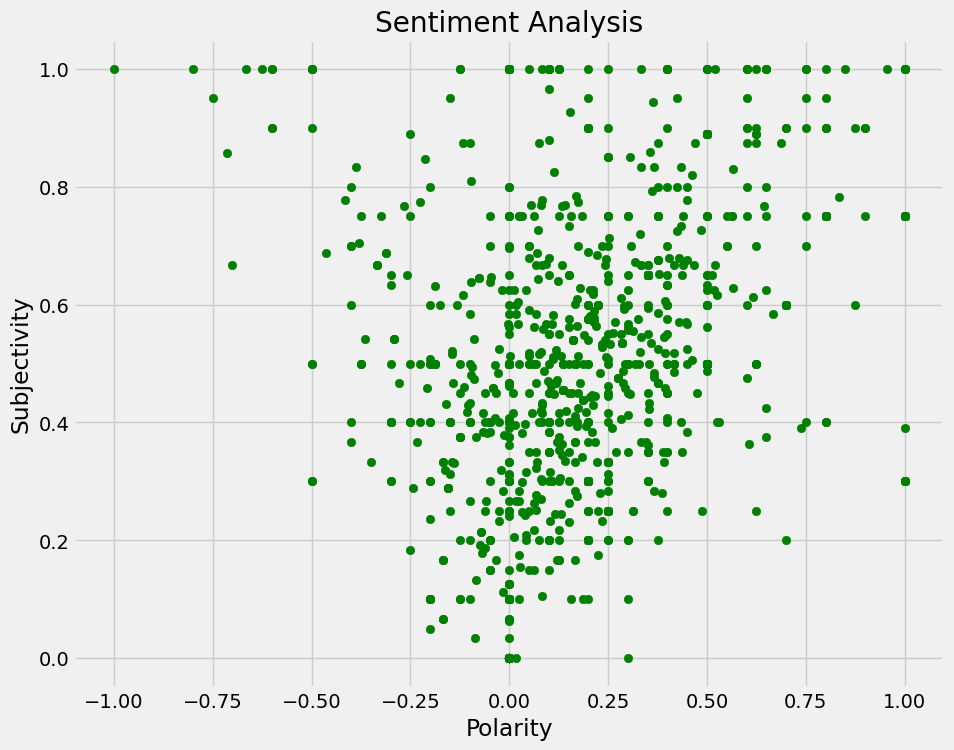

In [16]:
plt.figure(figsize=(10,8))
for i in range(0,tweets.shape[0]):
    plt.scatter(tweets['Polarity'][i],tweets['Subjectivity'][i],color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
positivetweets = tweets[tweets.Anaylsis  =='Positive']
positivetweets =positivetweets['Text']

In [20]:
round((positivetweets.shape[0]/tweets.shape[0])*100,1)

44.2

In [21]:
Negativetweets = tweets[tweets.Anaylsis  =='Negative']
Negativetweets =Negativetweets['Text']

In [22]:
round((Negativetweets.shape[0]/tweets.shape[0])*100,1)

11.0

In [24]:
Neutraltweets = tweets[tweets.Anaylsis  =='Neutral']
Neutraltweets =Neutraltweets['Text']

In [25]:
round((Neutraltweets.shape[0]/tweets.shape[0])*100,1)

44.8

In [28]:
print('All are in percentage %',
    '\nPostive tweets : ',round((positivetweets.shape[0]/tweets.shape[0])*100,1),
    '\n Negative tweets:',round((Negativetweets.shape[0]/tweets.shape[0])*100,1),
    '\n Neutral tweets:',round((Neutraltweets.shape[0]/tweets.shape[0])*100,1)
)

All are in percentage % 
Postive tweets :  44.2 
 Negative tweets: 11.0 
 Neutral tweets: 44.8


Sentiment Analysis

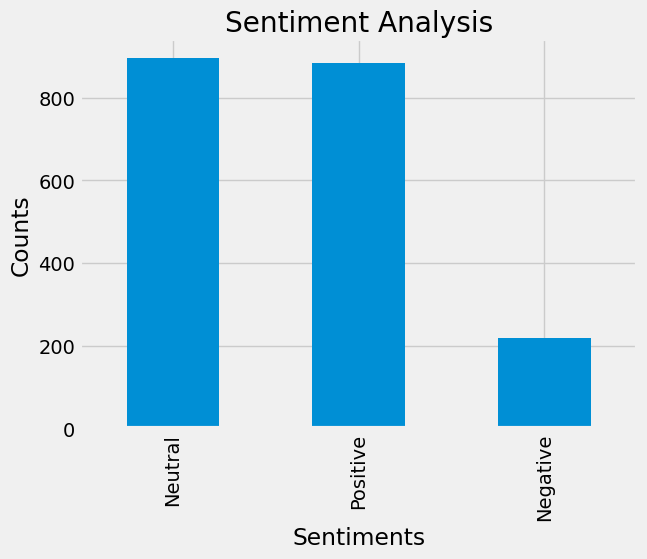

In [29]:
tweets['Anaylsis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
tweets['Anaylsis'].value_counts().plot(kind='bar')
plt.show()